In [1]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt


Using TensorFlow backend.


### Load Test Dataframe

In [64]:
df = pd.read_csv('Test.csv')

### Generate Images From Directory

In [65]:
# Path Directory
train_data_dir = '../Mod 6 Project/Data/Train'
test_data_dir = '../Mod 6 Project/Data/Test'

In [67]:
# Train batches
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    train_data_dir,
                    target_size=(64,64),
                    classes=[str(i) for i in np.arange(43)],
                    batch_size=39209)
# Test batches
test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    test_data_dir,
                    target_size=(64,64),
                    classes=[],
                    batch_size=12630)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [68]:
# Extract train/test batch sequences
train_data, train_labels = next(train_batches)
test_data, test_labels = next(test_batches)

In [69]:
print('test data: {}'.format(test_data.shape))
print('test label: {}'.format(test_labels.shape))
print('train data: {}'.format(train_data.shape))
print('train label: {}'.format(train_labels.shape))

test data: (12630, 64, 64, 3)
test label: (12630, 1)
train data: (39209, 64, 64, 3)
train label: (39209, 43)


## Reshaping Train and Test Labels from 1 to 43 Columns

In [70]:
# train labels
train_labels = np.array([list(img).index(1.0) for img in train_labels])

In [71]:
# test labels
path_test = [int(i.replace('Test/','').replace('.png','')) for i in list(df['Path'])] # remove 'Test/','.png'
id_test = list(df['ClassId'])
path_id = dict(zip(path_test, id_test)) # tuple of path, id
labels = [path_id[batch] for batch in list(test_batches.index_array)]
test_labels = np.array(labels)

In [72]:
print('test label: {}'.format(test_labels.shape))
print('train label: {}'.format(train_labels.shape))

test label: (12630,)
train label: (39209,)


In [73]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [74]:
print('test label: {}'.format(test_labels.shape))
print('train label: {}'.format(train_labels.shape))

test label: (12630, 43)
train label: (39209, 43)


### ConvNet Architecture

In [76]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
print(float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels))

41.07189231987332


## Baseline

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:3000]
partial_x_train = train_data[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=750,
                    validation_data=(x_val, y_val))

Train on 36209 samples, validate on 3000 samples
Epoch 1/5
36209/36209 [==============================] - 172s 5ms/step - loss: 3.1252 - accuracy: 0.2144 - val_loss: 2.2024 - val_accuracy: 0.3867
Epoch 2/5
36209/36209 [==============================] - 177s 5ms/step - loss: 1.6892 - accuracy: 0.5257 - val_loss: 1.1979 - val_accuracy: 0.6470
Epoch 3/5
36209/36209 [==============================] - 178s 5ms/step - loss: 0.8464 - accuracy: 0.7578 - val_loss: 0.5001 - val_accuracy: 0.8537
Epoch 4/5
36209/36209 [==============================] - 180s 5ms/step - loss: 0.4307 - accuracy: 0.8791 - val_loss: 0.5607 - val_accuracy: 0.8360
Epoch 5/5
36209/36209 [==============================] - 178s 5ms/step - loss: 0.2183 - accuracy: 0.9413 - val_loss: 0.2003 - val_accuracy: 0.9390


In [57]:
test_loss, test_acc = my_model.evaluate(test_data, test_labels)
print('Test accuracy: {}'.format(test_acc))

12630/12630 [==============================] - 11s 879us/step
Test accuracy: 0.9026920199394226


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = my_model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

f1 score: 0.9052361066495342


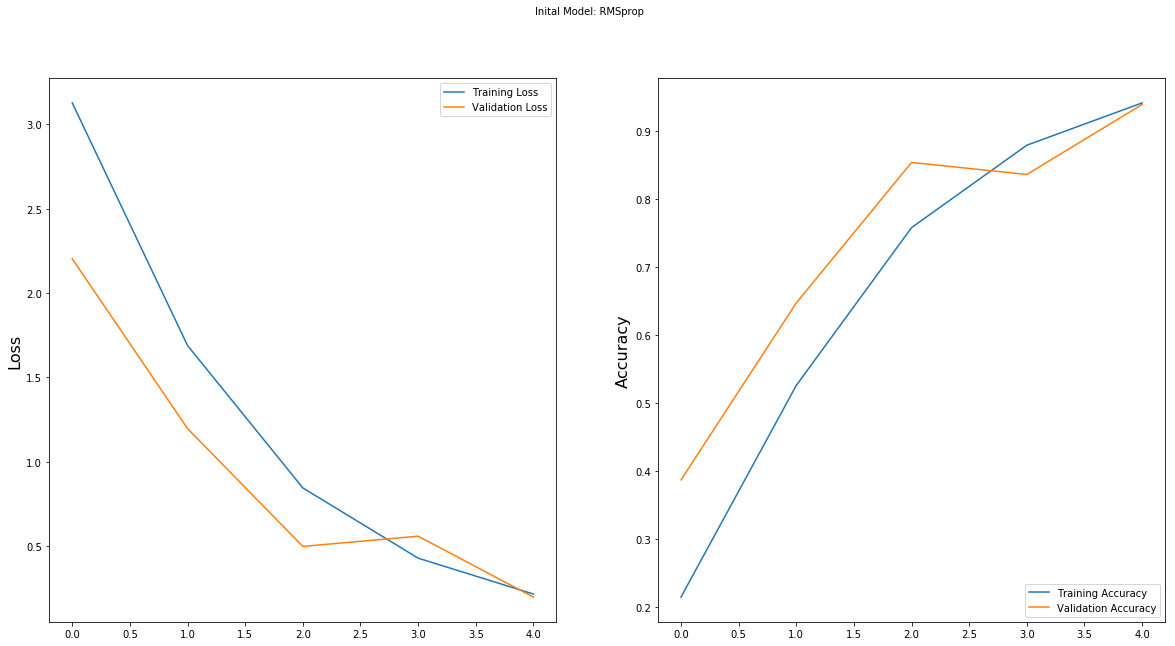

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Inital Model: RMSprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = my_model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

f1 score: 0.9052361066495342


## RMS PROP

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3))) # ADDED EPOCH
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:3000]
partial_x_train = train_data[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=250,
                    validation_data=(x_val, y_val))

Train on 36209 samples, validate on 3000 samples
Epoch 1/20
36209/36209 [==============================] - 250s 7ms/step - loss: 1.9841 - accuracy: 0.4592 - val_loss: 1.0113 - val_accuracy: 0.7027
Epoch 2/20
36209/36209 [==============================] - 208s 6ms/step - loss: 0.4089 - accuracy: 0.8824 - val_loss: 0.1797 - val_accuracy: 0.9550
Epoch 3/20
36209/36209 [==============================] - 179s 5ms/step - loss: 0.1331 - accuracy: 0.9637 - val_loss: 0.0983 - val_accuracy: 0.9770
Epoch 4/20
36209/36209 [==============================] - 179s 5ms/step - loss: 0.0596 - accuracy: 0.9837 - val_loss: 0.0745 - val_accuracy: 0.9833
Epoch 5/20
36209/36209 [==============================] - 181s 5ms/step - loss: 0.0361 - accuracy: 0.9908 - val_loss: 0.0546 - val_accuracy: 0.9910
Epoch 6/20
36209/36209 [==============================] - 197s 5ms/step - loss: 0.0215 - accuracy: 0.9946 - val_loss: 0.0584 - val_accuracy: 0.9900
Epoch 7/20
36209/36209 [==============================] - 187s 

In [40]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy: {}'.format(test_acc))

12630/12630 [==============================] - 22s 2ms/step
Test accuracy: 0.955898642539978


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

f1 score: 0.9567769053850425


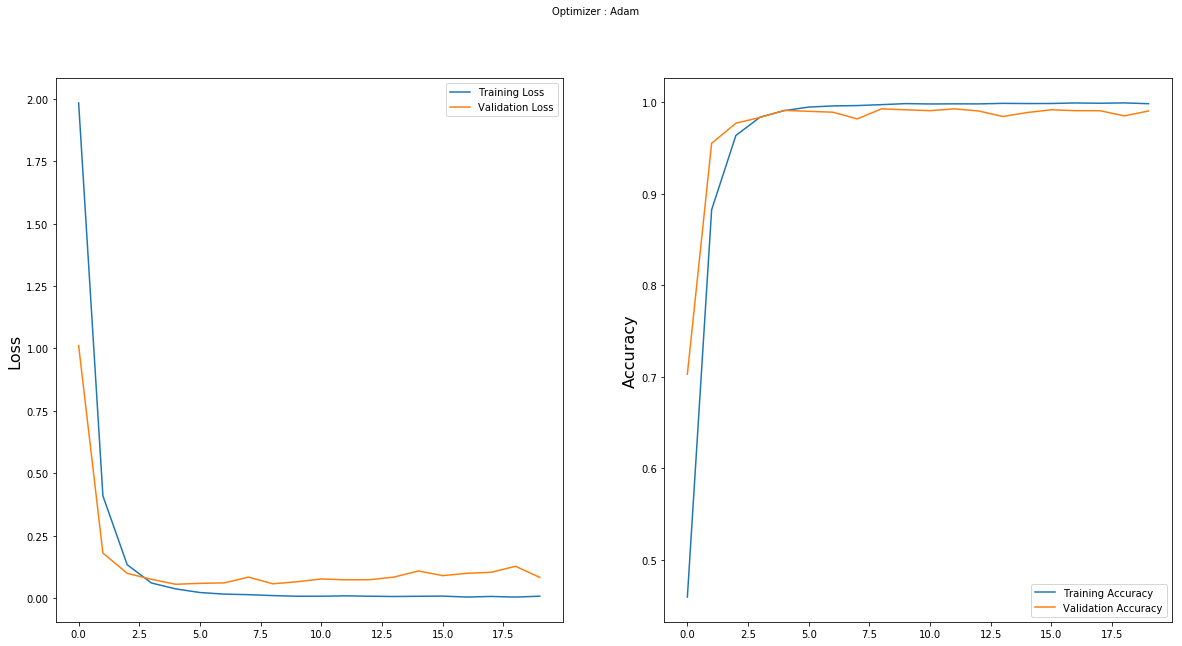

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## ADAM

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:3000]
partial_x_train = train_data[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=250,
                    validation_data=(x_val, y_val))

Train on 36209 samples, validate on 3000 samples
Epoch 1/20
36209/36209 [==============================] - 184s 5ms/step - loss: 1.3702 - accuracy: 0.6373 - val_loss: 0.2991 - val_accuracy: 0.9167
Epoch 2/20
36209/36209 [==============================] - 216s 6ms/step - loss: 0.1783 - accuracy: 0.9533 - val_loss: 0.1415 - val_accuracy: 0.9663
Epoch 3/20
36209/36209 [==============================] - 194s 5ms/step - loss: 0.0834 - accuracy: 0.9789 - val_loss: 0.1008 - val_accuracy: 0.9750
Epoch 4/20
36209/36209 [==============================] - 197s 5ms/step - loss: 0.0444 - accuracy: 0.9890 - val_loss: 0.1059 - val_accuracy: 0.9743
Epoch 5/20
36209/36209 [==============================] - 182s 5ms/step - loss: 0.0318 - accuracy: 0.9909 - val_loss: 0.0786 - val_accuracy: 0.9827
Epoch 6/20
36209/36209 [==============================] - 186s 5ms/step - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.0636 - val_accuracy: 0.9863
Epoch 7/20
36209/36209 [==============================] - 190s 

In [45]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy: {}'.format(test_acc))

12630/12630 [==============================] - 24s 2ms/step
Test accuracy: 0.9453681707382202


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

f1 score: 0.9460906818993217


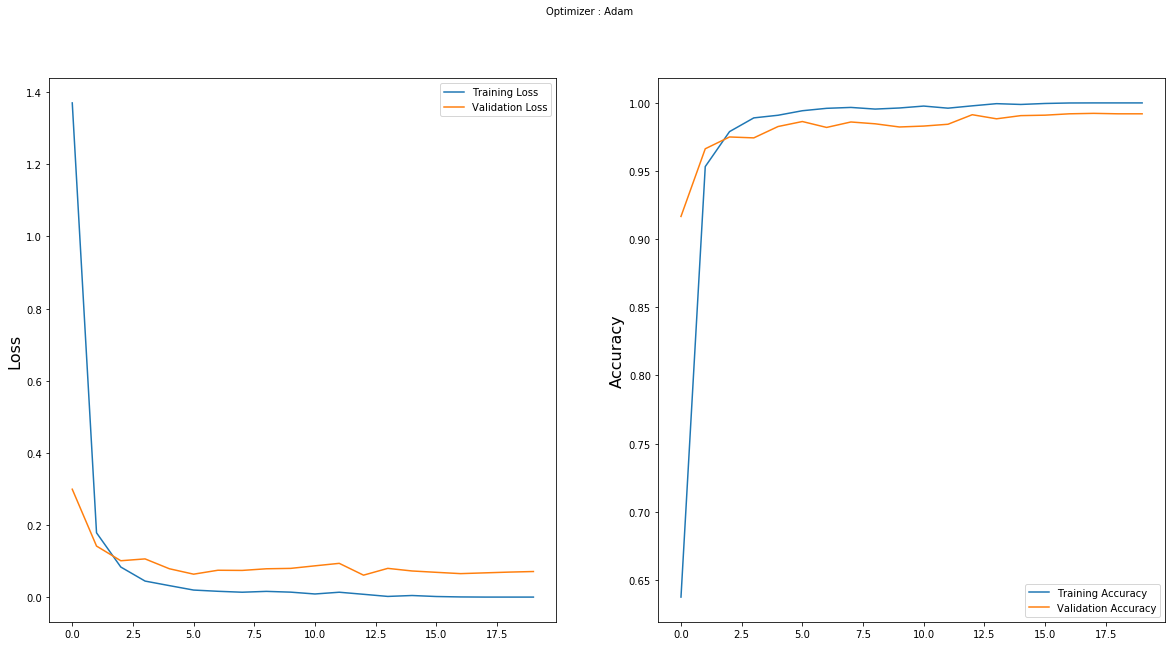

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## 6 Layer 

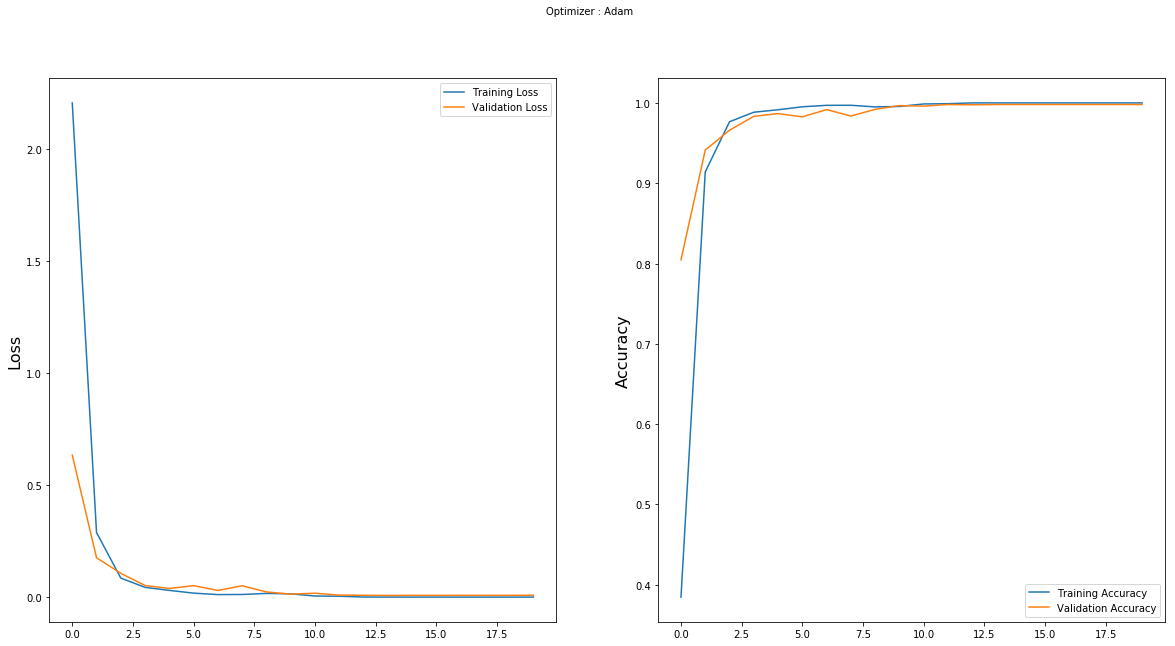

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## last exp

In [97]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = train_data[:3000]
partial_x_train = train_data[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=150,
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy: {}'.format(test_acc))

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

Train on 36209 samples, validate on 3000 samples
Epoch 1/15
36209/36209 [==============================] - 323s 9ms/step - loss: 1.9604 - accuracy: 0.4299 - val_loss: 0.5623 - val_accuracy: 0.8237
Epoch 2/15
36209/36209 [==============================] - 323s 9ms/step - loss: 0.2307 - accuracy: 0.9326 - val_loss: 0.0951 - val_accuracy: 0.9743
Epoch 3/15
36209/36209 [==============================] - 325s 9ms/step - loss: 0.0652 - accuracy: 0.9822 - val_loss: 0.0436 - val_accuracy: 0.9887
Epoch 4/15
36209/36209 [==============================] - 321s 9ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0625 - val_accuracy: 0.9830
Epoch 5/15
36209/36209 [==============================] - 321s 9ms/step - loss: 0.0225 - accuracy: 0.9936 - val_loss: 0.0449 - val_accuracy: 0.9887
Epoch 6/15
36209/36209 [==============================] - 321s 9ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0284 - val_accuracy: 0.9907
Epoch 7/15
36209/36209 [==============================] - 321s 

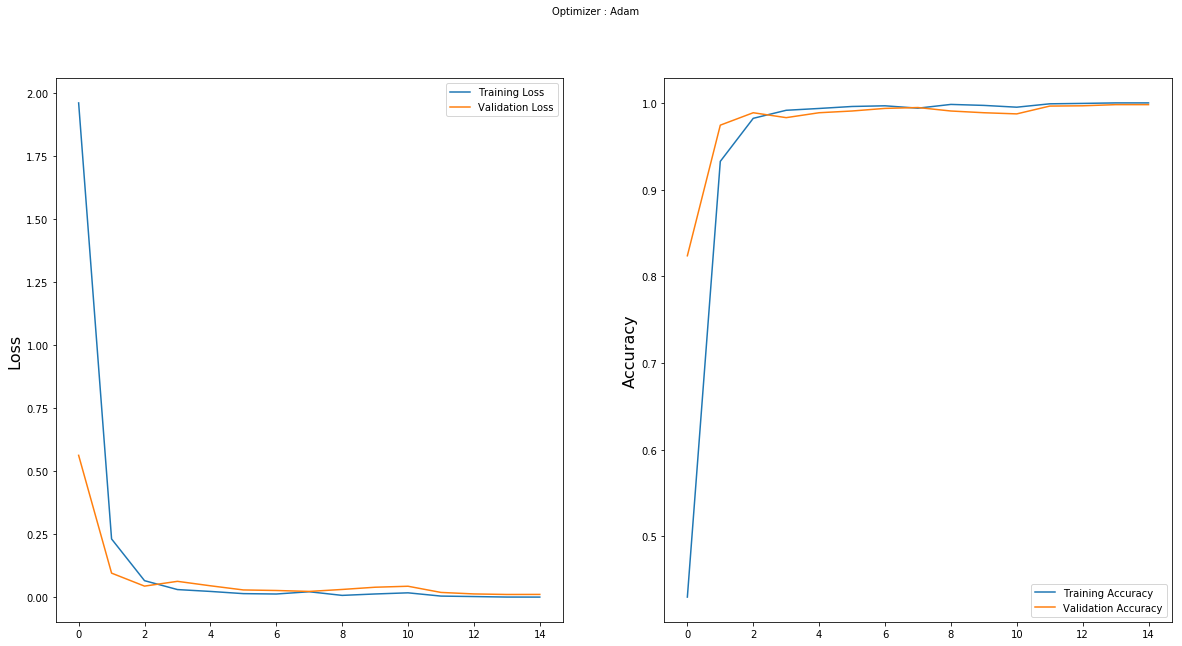

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

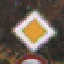

In [112]:
array_to_img(test_data[0])-

In [106]:
import keras
latent_dim = 32
height = 32
width = 32
channels = 3

generator_input = keras.Input(shape=(latent_dim,))

# First, transform the input into a 16x16 128-channels feature map
x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)

# Then, add a convolution layer
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

# Upsample to 32x32
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

# Few more conv layers
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

# Produce a 32x32 1-channel feature map
x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 32768)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 256)       1048

In [107]:

discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

# One dropout layer - important trick!
x = layers.Dropout(0.4)(x)

# Classification layer
x = layers.Dense(1, activation='sigmoid')(x)

discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

# To stabilize training, we use learning rate decay
# and gradient clipping (by value) in the optimizer.
discriminator_optimizer = keras.optimizers.RMSprop(lr=0.0008, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 6, 6, 128)         262272    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 6, 6, 128)         0   

In [108]:
# Set discriminator weights to non-trainable
# (will only apply to the `gan` model)
discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [110]:
import os
from keras.preprocessing import image

# Load CIFAR10 data
x_train = train_data
y_train = train_labels

# Select frog images (class 6)
x_train = x_train[y_train.flatten() == 6]

# Normalize data
x_train = x_train.reshape(
    (x_train.shape[0],) + (height, width, channels)).astype('float32') / 255.

iterations = 10000
batch_size = 20
save_dir = '/A'

# Start training loop
start = 0
for step in range(iterations):
    # Sample random points in the latent space
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # Decode them to fake images
    generated_images = generator.predict(random_latent_vectors)

    # Combine them with real images
    stop = start + batch_size
    real_images = x_train[start: stop]
    combined_images = np.concatenate([generated_images, real_images])

    # Assemble labels discriminating real from fake images
    labels = np.concatenate([np.ones((batch_size, 1)),
                             np.zeros((batch_size, 1))])
    # Add random noise to the labels - important trick!
    labels += 0.05 * np.random.random(labels.shape)

    # Train the discriminator
    d_loss = discriminator.train_on_batch(combined_images, labels)

    # sample random points in the latent space
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))

    # Assemble labels that say "all real images"
    misleading_targets = np.zeros((batch_size, 1))

    # Train the generator (via the gan model,
    # where the discriminator weights are frozen)
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
    
    start += batch_size
    if start > len(x_train) - batch_size:
      start = 0

    # Occasionally save / plot
    if step % 100 == 0:
        # Save model weights
        gan.save_weights('gan.h5')

        # Print metrics
        print('discriminator loss at step %s: %s' % (step, d_loss))
        print('adversarial loss at step %s: %s' % (step, a_loss))

        # Save one generated image
        img = image.array_to_img(generated_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'generated_frog' + str(step) + '.png'))

        # Save one real image, for comparison
        img = image.array_to_img(real_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'real_frog' + str(step) + '.png'))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 39209 but corresponding boolean dimension is 1685987

In [ ]:
import matplotlib.pyplot as plt

# Sample random points in the latent space
random_latent_vectors = np.random.normal(size=(10, latent_dim))

# Decode them to fake images
generated_images = generator.predict(random_latent_vectors)

for i in range(generated_images.shape[0]):
    img = image.array_to_img(generated_images[i] * 255., scale=False)
    plt.figure()
    plt.imshow(img)
    
plt.show()